<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from google.colab import drive  

import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import itertools


In [11]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/new_datasets'

Mounted at /content/gdrive


In [33]:
airline = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/airline_EDA.csv")

In [34]:
airline.shape

(787, 11)

In [ ]:
airline.sample(5)

,Unnamed: 0,Unnamed: 0.1,tweet_id,text,likes,airline,string_text,subjectivity,polarity,sentiment,reason
503,503,1128,1335408132734980097,"['memory', 'live', 'forever', 'last', 'flight'...",16,British airways,memory live forever last flight landor gbnly d...,0.283333,0.068182,Positive,['live']
286,286,644,1336879643039711233,"['qatarairways', 'qatar', 'government', 'conta...",0,Qatar airways,qatarairways qatar government contact victim s...,0.191667,-0.120833,Negative,"['victim', 'subject']"
628,628,1447,1334904958387412992,"['flight', 'flight', 'attendant', 'elizabeth',...",0,American airlines,flight flight attendant elizabeth charlotte sh...,0.566667,0.333333,Positive,"['attendant', 'amazing', 'whole']"
439,439,971,1336787455522054145,"['britishairways', 'whatabuy', 'broken', 'smas...",0,British airways,britishairways whatabuy broken smashed delayed...,0.400000,-0.400000,Negative,['broken']
47,47,130,1336311007191453696,"['messed', 'even', 'asking', 'spread', 'united...",0,United Airlines,messed even asking spread unitedairlines covid...,0.500000,0.500000,Positive,['safe']


In [ ]:
airline.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'tweet_id', 'text', 'likes', 'airline',
       'string_text', 'subjectivity', 'polarity', 'sentiment', 'reason'],
      dtype='object')

In [35]:
airline = airline.drop(['Unnamed: 0', 'Unnamed: 0.1','reason','subjectivity', 'polarity', 'string_text'], axis=1)

In [ ]:
airline.sample(5)

,tweet_id,text,likes,airline,sentiment
587,1336407446797971457,"['worst', 'americanairlines', 'faail', 'youare...",1,American airlines,Negative
752,1336074483551981568,"['love', 'sexandthecity', 'rare', 'cattrall', ...",1,Air Canada,Positive
120,1336649487511654400,"['live', 'final', 'farewell', 'gvlip', 'join',...",28,Virgin Atlantic,Positive
582,1336473955029270528,"['passenger', 'receive', 'result', 'takeoff', ...",0,American airlines,Positive
204,1336050394925916160,"['boycott', 'turkey', 'nice', 'untiltheyarehom...",2,Turkish airlines,Positive


In [ ]:
airline.isna().sum()

tweet_id        0
likes           0
airline         0
string_text     0
subjectivity    0
polarity        0
sentiment       0
dtype: int64

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     787 non-null    int64 
 1   likes        787 non-null    int64 
 2   airline      787 non-null    object
 3   string_text  787 non-null    object
 4   sentiment    787 non-null    object
dtypes: int64(2), object(3)
memory usage: 30.9+ KB


#Extract features test

In [ ]:
#transfom from str to list
airline['text'] = airline['text'].apply(eval)

In [ ]:
def getfeatures(keyword_list):
  airline['cancel'] = ''
  feature_dict['feature'] = feature
  for index, airline_list in enumerate(airline['text']):
    if any(word in airline_list for word in keyword_list):
      if 
      airline['cancel'][index] = 
      #feature_dict.setdefault("airline", []).append(1) 
      #feature_dict.setdefault("sentiment", []).append(airline['sentiment'][index])
      #feature_dict.setdefault("reason", []).append(airline['reason'][index])
  #feature_df = pd.DataFrame.from_dict(feature_dict)
  #feature_group = feature_df.groupby(['sentiment', 'airline']).sentiment.count().unstack()
  return feature_dict

SyntaxError: ignored

In [ ]:
#yes
keyword_list = ['safe']
airline['safe'] = ''
for index, airline_list in enumerate(airline['text']):
  for word in keyword_list:
    if word in airline_list:
      if word == 'safe':
        airline['safe'][index] = 1
        
     # if word == 'cancel':
      #  print('yes')
        #airline['cancel'][index] = 1
      #else:
      #  print("no")
     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#yes function
keyword_list = ['canceled', 'cancellation', 'staff', 'crew','price', 'money', 'cheap', 'expensive', 'cost',
                ]
airline['vision'] = ''
airline['safe'] = ''
for index, airline_list in enumerate(airline['text']):
  for word in keyword_list:
    if word in airline_list:
      airline['safe'][index] = 1 if word == 'safe' else 0
      airline['vision'][index] = 1 if word == 'vision' else 0
     # if word == 'cancel':
      #  print('yes')
        #airline['cancel'][index] = 1
      #else:
      #  print("no")
     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
#add columns for features
airline['cancel'] = ''
airline['flight'] = ''


airline['staff'] = ''


airline['cost'] = ''

airline['refund']= ''
airline['ticket']= ''

airline['service'] = ''
airline['customer'] = ''
airline['experience'] = ''

#Extract features
#Add features column
Extract features from each tweet and create a column for each feature, this represented by 0 (did not find the feature) and 1 (found the feature).

In [36]:
#transfom from str to list
airline['text'] = airline['text'].apply(eval)

In [37]:
#feature: column name
#keyword_list: for that feature 
def getfeatures(feature, keyword_list):
  for index, airline_list in enumerate(airline['text']):
    if any(word in airline_list for word in keyword_list):
      airline[feature][index] = 1 
    else:
      airline[feature][index] = 0
  return airline

In [38]:
airline['cancel'] = ''
keyword_list = ['canceled', 'cancellation', ]
airline = getfeatures('cancel', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
airline['staff'] = ''
keyword_list = ['staff', 'crew', 'team', 'agent', 'personnel', 'worker', 'workforce', 'employee', 'group']
airline = getfeatures('staff', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
airline['flight'] = ''
keyword_list = ['flight', 'aviation', 'transport']
airline = getfeatures('flight', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
airline['cost'] = ''
keyword_list = ['cost', 'money', 'price', 'expensive', 'cheap','deal', 'offer', 'dollars', 'overpriced', 'underpriced', 'ticket',
                'expense', 'charge', 'value', 'expenditure','cash']
airline = getfeatures('cost', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
airline['refund'] = ''
keyword_list = ['refund', 'return', 'repayment', 'pay', 'give', 'back', 'repaid']
airline = getfeatures('refund', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
airline['customrt service'] = ''
keyword_list = ['service', 'customer', 'client', 'care', 'support', 'assistance']
airline = getfeatures('customrt service', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
airline['experience'] = ''
keyword_list = ['experience','undergo']
airline = getfeatures('experience', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
airline.sample(5)

,tweet_id,text,likes,airline,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
58,1335661564427464704,"[fashion, unitedairlines, common, retweet]",0,United Airlines,Negative,0,0,0,0,0,0,0
46,1336369182762541062,"[worst, airline, everattendants, unprofessiona...",0,United Airlines,Negative,0,0,0,0,0,0,0
80,1334598838812897282,"[unitedairlines, first, receive, delivery]",0,United Airlines,Positive,0,0,0,0,0,0,0
109,1336927559557271552,"[gvros, literally, minute, sister, landed, sen...",0,Virgin Atlantic,Positive,0,0,0,0,0,0,0
631,1334842984022609923,"[know, come, thank, staff, easyjet, great, cus...",0,American airlines,Positive,0,1,0,0,0,0,0


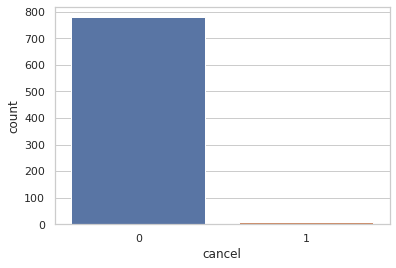

In [54]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="cancel",data=airline)

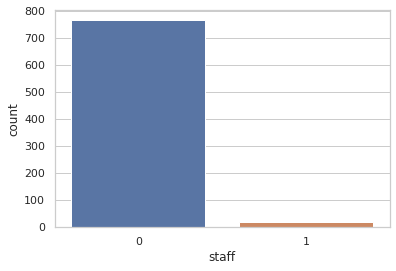

In [55]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="staff",data=airline)

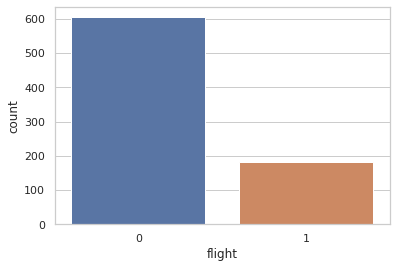

In [56]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="flight",data=airline)

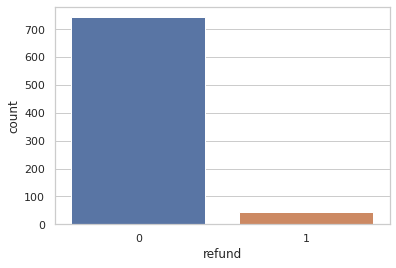

In [60]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="refund",data=airline)

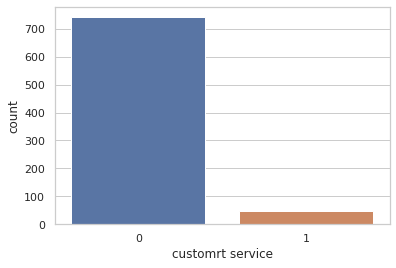

In [61]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="customrt service",data=airline)

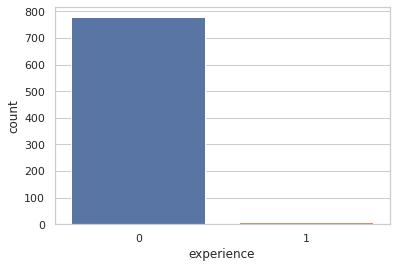

In [62]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="experience",data=airline)

In [ ]:
#save them first because without saving it, it will cause me issues later
airline.to_csv('airline_features.csv')
!cp airline_features.csv "./gdrive/My Drive/datasets/new_datasets/"

In [4]:
airline = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/airline_features.csv")

In [5]:
airline.shape

(787, 13)

In [ ]:
#test
text_list = ['changi', 'ready', 'vaccine', 'distribution', 'asia', 'singapore', 'cargo', 'gear', 'safe', 'transportation']
keyword_list = ['see']
for i in text_list:
  if i in keyword_list:
    print("yes") if word == 'safe' else print("no")

In [ ]:
airline.head(5)

,Unnamed: 0,tweet_id,text,likes,airline,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
0,0,1336979288470548481,"['achieve', 'kingdom', 'vision', 'sustainabili...",0,Saudia airlines,Positive,0,0,0,0,0,0,0
1,1,1336950027005161473,"['achieve', 'kingdom', 'vision', 'sustainabili...",5,Saudia airlines,Positive,0,0,1,0,0,0,0
2,2,1336650296962019329,"['happy', 'anniversary', 'best', 'airline', 'e...",1,Saudia airlines,Positive,0,0,0,0,0,0,0
3,3,1336586520313143298,"['realflow', 'allinone', 'software', 'start', ...",0,Saudia airlines,Positive,0,0,0,0,0,0,0
4,4,1336552573650661377,"['airline', 'great', 'taste', 'travel', 'soft'...",0,Saudia airlines,Positive,0,1,0,0,0,0,0


In [ ]:
test

{'airline': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'feature': 'feature'}

In [5]:
airline = airline.drop(['text', 'Unnamed: 0'], axis=1 )

In [7]:
airline.shape

(787, 11)

In [8]:
airline.head(5)

,tweet_id,likes,airline,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
0,1336979288470548481,0,Saudia airlines,Positive,0,0,0,0,0,0,0
1,1336950027005161473,5,Saudia airlines,Positive,0,0,1,0,0,0,0
2,1336650296962019329,1,Saudia airlines,Positive,0,0,0,0,0,0,0
3,1336586520313143298,0,Saudia airlines,Positive,0,0,0,0,0,0,0
4,1336552573650661377,0,Saudia airlines,Positive,0,1,0,0,0,0,0


#extract features using Scipy

In [90]:
!pip3 install ner

  Created wheel for ner: filename=ner-0.1-cp36-none-any.whl size=5506 sha256=83c86c7b42b53ed6d6505cc9c9f1ecfd8cc2ac1daa7956407b0e3477b544ed68
  Stored in directory: /root/.cache/pip/wheels/4d/37/8e/7e9997b1f3f589702d71788aa90f4709bec3c3245c1d65939c
Successfully built ner


In [2]:
## for data
import pandas as pd
import collections
import json
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
## for text processing
import re
import nltk
## for language detection
#import langdetect 
## for sentiment
from textblob import TextBlob
## for ner
import spacy 

## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim

In [101]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=785cdf93e7181cc7e4724bc68607256f7a9a9bbd0d5a13a5a4786f6afe8769bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-nmzx2n50/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [4]:
 ## call model
ner = spacy.load('en_core_web_lg')
## tag text
txt = airline["text"].iloc[0]
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")

/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'<div class="entities" style="line-height: 2.5; direction: ltr">[\'achieve\', \'kingdom\', \'vision\', \'sustainability\', \'economic\', \'power\', \'social\', \'development\', \'knowledge\', \'transfer\']</div>'

In [5]:
## tag text and exctract tags into a list
airline["tags"] = airline["text"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
airline["tags"] = airline["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in airline["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     airline["tags_"+feature] = airline["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))

## print result
airline.head()

,Unnamed: 0,tweet_id,text,likes,airline,sentiment,cancel,staff,flight,cost,refund,customrt service,experience,tags,tags_CARDINAL,tags_LOC,tags_QUANTITY,tags_ORG,tags_DATE,tags_FAC,tags_GPE,tags_TIME,tags_PERSON,tags_PRODUCT,tags_LANGUAGE,tags_WORK_OF_ART,tags_NORP,tags_ORDINAL
0,0,1336979288470548481,"['achieve', 'kingdom', 'vision', 'sustainabili...",0,Saudia airlines,Positive,0,0,0,0,0,0,0,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1336950027005161473,"['achieve', 'kingdom', 'vision', 'sustainabili...",5,Saudia airlines,Positive,0,0,1,0,0,0,0,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1336650296962019329,"['happy', 'anniversary', 'best', 'airline', 'e...",1,Saudia airlines,Positive,0,0,0,0,0,0,0,"[{('saudia', 'GPE'): 1}]",0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,1336586520313143298,"['realflow', 'allinone', 'software', 'start', ...",0,Saudia airlines,Positive,0,0,0,0,0,0,0,"[{('realflow', 'PRODUCT'): 1}]",0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,1336552573650661377,"['airline', 'great', 'taste', 'travel', 'soft'...",0,Saudia airlines,Positive,0,1,0,0,0,0,0,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
airline.sample(10)

,Unnamed: 0,tweet_id,text,likes,airline,sentiment,cancel,staff,flight,cost,refund,customrt service,experience,tags,tags_CARDINAL,tags_LOC,tags_QUANTITY,tags_ORG,tags_DATE,tags_FAC,tags_GPE,tags_TIME,tags_PERSON,tags_PRODUCT,tags_LANGUAGE,tags_WORK_OF_ART,tags_NORP,tags_ORDINAL
420,420,1335551001424785408,"['covid', 'restriction', 'imagine', 'difficult...",0,fly Dubai,Negative,0,0,0,0,0,0,0,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0
549,549,1334030022018015237,"['oneworld', 'named', 'best', 'airline', 'alli...",0,British airways,Positive,0,0,0,0,0,0,0,"[{('sixth', 'ORDINAL'): 1}, {('year'', 'DATE')...",0,0,0,0,1,0,0,0,0,0,0,0,0,1
176,176,1334430167335317505,"['never', 'forget', 'first', 'flight', 'aircra...",11,Virgin Atlantic,Positive,0,0,1,0,0,0,0,"[{('first', 'ORDINAL'): 1}, {('tuesday', 'DATE...",0,0,0,0,1,0,1,0,0,0,0,0,0,1
430,430,1337074621930205186,"['research', 'prof', 'airline', 'give', 'fearf...",0,British airways,Negative,0,0,0,0,0,0,0,"[{('britishairways', 'PERSON'): 1}]",0,0,0,0,0,0,0,0,1,0,0,0,0,0
249,249,1334729763613622272,"['consumer', 'flight', 'booking', 'cancelled',...",2,Singapor airlines,Negative,0,0,1,0,1,0,0,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0
203,203,1336050494821691392,"['renag', 'boycott', 'turkey', 'nice']",1,Turkish airlines,Positive,0,0,0,0,0,0,0,"[{('renag', 'PERSON'): 1}, {('turkey', 'GPE'):...",0,0,0,0,0,0,1,0,1,0,0,0,0,0
80,80,1334598838812897282,"['unitedairlines', 'first', 'receive', 'delive...",0,United Airlines,Positive,0,0,0,0,0,0,0,"[{('first', 'ORDINAL'): 1}]",0,0,0,0,0,0,0,0,0,0,0,0,0,1
687,687,1336388600980787203,"['airfrance', 'team', 'processing', 'refund', ...",0,Air France,Negative,0,1,0,0,1,0,0,"[{('airfrance', 'ORG'): 1}, {('fabien', 'PERSO...",0,0,0,1,0,0,0,0,1,0,0,0,0,0
664,664,1334150926958026752,"['free', 'mile', 'seat', 'upgrade', 'american'...",0,American airlines,Positive,0,0,0,0,0,0,0,"[{('american', 'NORP'): 1}, {('gtgt', 'PERSON'...",0,0,0,0,0,0,0,0,1,0,0,0,1,0
480,480,1335953948893728769,"['express', 'latest', 'flight', 'update', 'bri...",0,British airways,Positive,0,0,1,0,0,0,0,"[{('britishairways', 'PERSON'): 1}, {('easyjet...",0,0,0,2,0,0,0,0,1,0,0,0,0,0


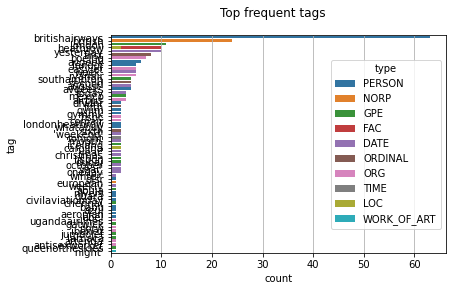

In [22]:
y = "British airways"
 
tags_list = airline[airline["airline"]==y]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
airline_tags = pd.DataFrame(map_lst, columns=['tag','type'])
airline_tags["count"] = 1
airline_tags = airline_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=airline_tags, dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

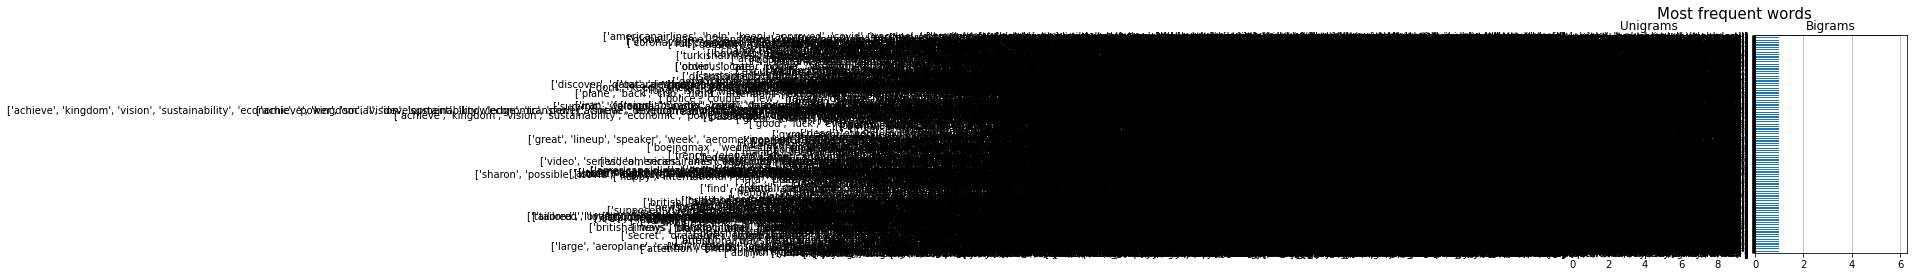

In [32]:
y = "British airways"
corpus = airline[airline["airline"]==y]["text"]
#lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(airline['text'])
airline_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
airline_uni.set_index("Word").sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(airline['text'], 2))
airline_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
airline_bi["Word"] = airline_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
airline_bi.set_index("Word").sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

#**Preproccesing**

#Devide the dataset into predictors and target

In [ ]:
X = airline.iloc[:,:-1].values #all predictor columns without the target
y = airline.iloc[:,-1].values #last column (target)

In [ ]:
airline.columns

Index(['tweet_id', 'likes', 'airline', 'sentiment', 'cancel', 'staff',
       'flight', 'cost', 'refund', 'customrt service', 'experience'],
      dtype='object')

In [ ]:
x_data.head(5)

,likes,airline,cancel,staff,flight,cost,refund,customrt service,experience
0,0,Saudia airlines,0,0,0,0,0,0,0
1,5,Saudia airlines,0,0,1,0,0,0,0
2,1,Saudia airlines,0,0,0,0,0,0,0
3,0,Saudia airlines,0,0,0,0,0,0,0
4,0,Saudia airlines,0,1,0,0,0,0,0


#Encoding the variables


- airline
- sentiment (target)

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',
                                      OneHotEncoder(), 
                                      [3])], 
                                      remainder='passthrough')

air = ct.fit_transform(x_data)
x_data = np.array(x_data)
print(x_data)


[[0 'Saudia airlines' 0 ... 0 0 0]
 [5 'Saudia airlines' 0 ... 0 0 0]
 [1 'Saudia airlines' 0 ... 0 0 0]
 ...
 [1 'Air Canada' 0 ... 0 0 0]
 [0 'Air Canada' 0 ... 0 0 0]
 [1 'Air Canada' 0 ... 0 0 0]]


In [34]:
#yes
le = LabelEncoder()
airline['airline'] = le.fit_transform(airline['airline'])
airline

,tweet_id,likes,airline,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
0,1336979288470548481,0,5,1,0,0,0,0,0,0,0
1,1336950027005161473,5,5,1,0,0,1,0,0,0,0
2,1336650296962019329,1,5,1,0,0,0,0,0,0,0
3,1336586520313143298,0,5,1,0,0,0,0,0,0,0
4,1336552573650661377,0,5,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
782,1333916450038312961,0,0,1,0,0,1,0,0,0,0
783,1333904615021088770,0,0,1,0,0,0,1,0,0,0
784,1333882951713624069,1,0,1,0,0,0,0,0,0,0
785,1333816531353006083,0,0,0,0,0,0,0,0,0,0


In [35]:
#yes
le = LabelEncoder()
airline['sentiment'] = le.fit_transform(airline['sentiment'])
airline

,tweet_id,likes,airline,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
0,1336979288470548481,0,5,1,0,0,0,0,0,0,0
1,1336950027005161473,5,5,1,0,0,1,0,0,0,0
2,1336650296962019329,1,5,1,0,0,0,0,0,0,0
3,1336586520313143298,0,5,1,0,0,0,0,0,0,0
4,1336552573650661377,0,5,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
782,1333916450038312961,0,0,1,0,0,1,0,0,0,0
783,1333904615021088770,0,0,1,0,0,0,1,0,0,0
784,1333882951713624069,1,0,1,0,0,0,0,0,0,0
785,1333816531353006083,0,0,0,0,0,0,0,0,0,0


In [73]:
#yes
x_data = airline[['likes', 'sentiment', 'cancel', 'staff', 'flight', 'cost', 'refund', 'customrt service', 'experience']]
y_data = airline['airline']

In [ ]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
airline = np.array(columnTransformer.fit_transform(airline), dtype = np.str)
airline

#Encoding the dependent variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_data = le.fit_transform(y_data)
print(y_data)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 

#Dealing with datetime

In [ ]:
from datetime import datetime
for date in saudia_airlines.iloc[:,0]:
  datetime_object = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
saudia_airlines.iloc[:,0]

#Test-Train split

70% train
30# test

In [37]:
#yes
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, stratify=y_data, random_state=123)


In [ ]:
train_df, test_df = train_test_split(airline, test_size=0.3, random_state=42)

#TF-IDF Features

This method  is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

In [ ]:
# bag of words model
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(train_tweets)
test_tfidf_model = vectorizer.transform(test_tweets)

In [ ]:
# bag of words model
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(train_tweets)
test_tfidf_model = vectorizer.transform(test_tweets)

In [ ]:
# let's look at the dataframe
train_tfidf = pd.DataFrame(train_tfidf_model.toarray(), columns=vectorizer.get_feature_names())
train_tfidf

,aateam,abby,abka,able,absolute,absolutely,abuja,abuse,access,accessibil,according,accordingly,achieve,acid,action,actively,actor,actually,adding,addition,additional,address,adeola,administration,admit,adult,adventure,advertises,advice,advised,aeromexicoproud,aeroplan,aeroplane,aeroplanecake,affordable,afklmphereforyou,afpa,africa,afternoon,agile,...,woman,wonderful,wondering,wont,word,work,worked,worker,world,worldwide,worse,worst,worstairlinesunited,worth,worthless,would,wrong,wrote,xlovers,yash,yeahnahhh,year,yearold,yearstogo,yesterday,york,youarewhywefly,yougofirst,youll,young,youngest,youre,youtube,zachgriff,zarif,zero,الخطوطالسعودية,المصالحةالخليجية,اليومالعالميلذويالإعاقة,نخدمكم
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.359559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.333008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.337709,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
for i in train_df:
  train_df[i, -1] = train_tfidf[i]

#**Multiclass Classification**

The **target** is predicting the **airline** using the **features** and **tweets' likes**

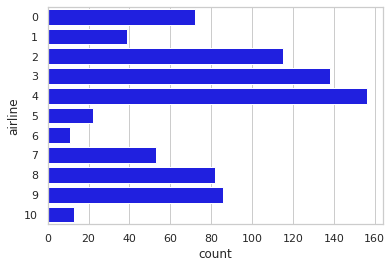

In [50]:
#sort without colors
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=airline, color= 'blue')

#Dealing with imbalance data

https://towardsdatascience.com/how-to-deal-with-imbalanced-data-34ab7db9b100

**Confusion-Matrix:**
In case of imbalanced classes confusion-matrix is good technique to summarizing the performance of a classification algorithm.


Since, as explained above, accuracy isn’t a good measure when working with imbalanced datasets, let’s consider more appropriate measures.

Precision: True Positives / All Predicted Positives = TP / (TP+FP). Precision is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.


Recall: True Positives / All actual positives = TP / (TP + FN). Recall is a measure of a classifier’s completeness. It is also the same as Sensitivity or the True positive rate. Low recall indicates a high number of false negatives.


F1 score: 2TP/(2TP + FP + FN) A weighted average of precision and recall. If we wanted a balance between precision and recall then we’d look at F1 score.


#Attempt five models

- Logistic Regression,
- MultinomialNB
- DecisionTreeClassifier
- RandomForestClassifier
- KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

In [42]:
knn_classifier.score(X_test, y_test)

0.7974683544303798

In [ ]:

snn_classifier = MLPClassifier()
snn_classifier.fit(training_inputs, training_outputs)
snn_predictions = snn_classifier.predict(training_inputs)

#try

In [65]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
# For reproducibility
np.random.seed(1237)

In [3]:
airline = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/airline_features.csv")

In [15]:
airline = airline.drop(['text', 'Unnamed: 0'], axis=1 )

In [16]:
#yes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
airline['airline'] = le.fit_transform(airline['airline'])
airline


,tweet_id,likes,airline,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
0,1336979288470548481,0,5,Positive,0,0,0,0,0,0,0
1,1336950027005161473,5,5,Positive,0,0,1,0,0,0,0
2,1336650296962019329,1,5,Positive,0,0,0,0,0,0,0
3,1336586520313143298,0,5,Positive,0,0,0,0,0,0,0
4,1336552573650661377,0,5,Positive,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
782,1333916450038312961,0,0,Positive,0,0,1,0,0,0,0
783,1333904615021088770,0,0,Positive,0,0,0,1,0,0,0
784,1333882951713624069,1,0,Positive,0,0,0,0,0,0,0
785,1333816531353006083,0,0,Negative,0,0,0,0,0,0,0


In [17]:
airline['sentiment'] = le.fit_transform(airline['sentiment'])
airline

,tweet_id,likes,airline,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
0,1336979288470548481,0,5,1,0,0,0,0,0,0,0
1,1336950027005161473,5,5,1,0,0,1,0,0,0,0
2,1336650296962019329,1,5,1,0,0,0,0,0,0,0
3,1336586520313143298,0,5,1,0,0,0,0,0,0,0
4,1336552573650661377,0,5,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
782,1333916450038312961,0,0,1,0,0,1,0,0,0,0
783,1333904615021088770,0,0,1,0,0,0,1,0,0,0
784,1333882951713624069,1,0,1,0,0,0,0,0,0,0
785,1333816531353006083,0,0,0,0,0,0,0,0,0,0


In [18]:
#yes
x_data = airline[['likes', 'sentiment', 'cancel', 'staff', 'flight', 'cost', 'refund', 'customrt service', 'experience']]
y_data = airline['airline']

In [19]:
y_data.value_counts()

4     156
3     138
2     115
9      86
8      82
0      72
7      53
1      39
5      22
10     13
6      11
Name: airline, dtype: int64

In [69]:
y_data[0]

5

In [20]:
class_labels = airline.airline.tolist()

In [21]:
num_labels = 11
vocab_size = 9
batch_size = 100
num_epochs = 30

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, stratify=y_data, random_state=123)

In [23]:
x_train

,likes,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
460,0,1,0,0,0,0,0,0,0
236,0,0,0,0,0,0,0,0,0
38,8,1,0,0,0,0,0,0,0
12,0,1,0,0,0,0,0,0,0
544,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
71,52,1,0,0,0,0,0,0,0
534,0,1,0,0,1,0,0,0,0
44,0,1,1,0,0,1,0,0,0
655,0,0,0,0,0,0,0,0,0


In [24]:
#take the 11 labeles
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [25]:
x_train.shape, y_train.shape

((629, 9), (629, 11))

In [26]:
x_test.shape , y_test.shape

((158, 9), (158, 11))

#Build model

In [27]:
#let us build a basic model
model = Sequential()
model.add(Dense(512, input_dim= vocab_size))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                5

#Train model

In [28]:
#The batch size is the number of training samples in one forward/backward pass.
#The higher the batch size, the more memory space you will need.
num_epochs =100
batch_size = 128
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    validation_split=0.2)

Epoch 1/100
4/4 - 0s - loss: 3.5202 - accuracy: 0.1531 - val_loss: 2.7778 - val_accuracy: 0.2063
Epoch 2/100
4/4 - 0s - loss: 3.2055 - accuracy: 0.2207 - val_loss: 2.6775 - val_accuracy: 0.1032
Epoch 3/100
4/4 - 0s - loss: 2.9785 - accuracy: 0.1869 - val_loss: 2.3968 - val_accuracy: 0.1190
Epoch 4/100
4/4 - 0s - loss: 2.7058 - accuracy: 0.1988 - val_loss: 2.2529 - val_accuracy: 0.2143
Epoch 5/100
4/4 - 0s - loss: 3.3002 - accuracy: 0.2048 - val_loss: 2.3549 - val_accuracy: 0.1667
Epoch 6/100
4/4 - 0s - loss: 3.0414 - accuracy: 0.2028 - val_loss: 2.4281 - val_accuracy: 0.1667
Epoch 7/100
4/4 - 0s - loss: 2.6537 - accuracy: 0.2107 - val_loss: 2.4132 - val_accuracy: 0.1746
Epoch 8/100
4/4 - 0s - loss: 2.6609 - accuracy: 0.2068 - val_loss: 2.6284 - val_accuracy: 0.1667
Epoch 9/100
4/4 - 0s - loss: 2.6697 - accuracy: 0.2008 - val_loss: 2.3554 - val_accuracy: 0.2063
Epoch 10/100
4/4 - 0s - loss: 2.5509 - accuracy: 0.2346 - val_loss: 2.3149 - val_accuracy: 0.1984
Epoch 11/100
4/4 - 0s - loss:

#Evaluate model

In [29]:
score, acc = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=2)

print('Test accuracy:', acc)

2/2 - 0s - loss: 2.3951 - accuracy: 0.2089
Test accuracy: 0.20886075496673584


In [30]:
model.predict(x_test, batch_size=None , verbose= 0, steps = None)

array([[0.00257312, 0.00933814, 0.09271989, ..., 0.41408825, 0.00892003,
        0.00088541],
       [0.02655907, 0.05842082, 0.17842774, ..., 0.12822399, 0.1292261 ,
        0.00486849],
       [0.18208514, 0.08014271, 0.13317911, ..., 0.10148013, 0.09870041,
        0.00876154],
       ...,
       [0.11556129, 0.03983742, 0.04612877, ..., 0.11972239, 0.01279034,
        0.03163864],
       [0.02655907, 0.05842082, 0.17842774, ..., 0.12822399, 0.1292261 ,
        0.00486849],
       [0.02655907, 0.05842082, 0.17842774, ..., 0.12822399, 0.1292261 ,
        0.00486849]], dtype=float32)

#SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is an over-sampling method. What it does is, it creates synthetic (not duplicate) samples of the minority class. Hence making the minority class equal to the majority class.

In [31]:
#Let us try some sampling technique to remove class imbalance
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
smote = SMOTE('minority')

X_sm, y_sm = smote.fit_sample(x_train, y_train)
print(X_sm.shape, y_sm.shape)

(745, 9) (745, 11)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [32]:
y_train_labels = np.argmax(y_train, axis =1)
y_train_labels

array([ 3,  7,  8,  5,  3,  1,  7,  0,  4,  2,  0,  4,  8,  9,  0,  0,  3,
        2,  3,  0,  8,  8,  9,  9,  7,  9,  3,  9,  2,  3,  8,  8,  0,  3,
        1,  9,  2,  4,  6,  4,  6,  9,  9,  1,  2,  4,  7,  9,  8,  3,  3,
        0,  7,  9,  9,  9, 10,  9,  0,  4,  2,  8,  8,  3,  2,  1,  4,  3,
        2,  1,  8,  9,  8,  2,  1,  0,  9,  4,  3,  2,  7,  8,  8,  3,  7,
        9,  9,  2,  4,  2,  2,  7,  4,  3,  0,  4,  0,  4,  3,  3,  4,  4,
        3,  2,  9,  4,  5,  4,  4,  3,  2,  7,  9,  0,  1,  7, 10,  0,  4,
        2,  0,  3,  3,  4,  3,  3,  7,  3,  3,  2,  0,  2,  4,  5,  3,  3,
        8,  3,  3,  3,  4,  4,  6,  7,  4,  9,  7,  4,  4,  4,  3,  8,  4,
        0,  0, 10,  0,  7,  3,  2,  4,  2,  4,  3,  9,  3,  4,  2,  4,  2,
        1,  1,  3,  4,  1,  5,  4,  3,  3,  2,  4,  4, 10,  2,  0,  2,  5,
        4, 10,  0,  4,  9,  7,  3,  4,  9,  7,  1,  2,  3,  7,  4,  3,  3,
        4,  8,  3,  2,  2,  2,  2,  7,  2,  3,  3,  4,  8, 10,  0,  0,  3,
        0,  4,  3,  7,  4

In [35]:
prediction = model.predict(x_test)

In [36]:
predictions = np.argmax(prediction, axis = 1)

In [37]:
predictions

array([4, 4, 2, 0, 2, 9, 4, 4, 3, 4, 3, 7, 4, 4, 4, 4, 4, 4, 2, 9, 2, 4,
       4, 4, 2, 2, 3, 4, 9, 4, 4, 2, 2, 3, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4,
       0, 4, 4, 4, 4, 2, 0, 4, 4, 0, 2, 2, 4, 4, 9, 3, 4, 0, 4, 0, 4, 4,
       4, 0, 4, 2, 4, 2, 4, 0, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 0, 4,
       2, 4, 2, 4, 0, 9, 4, 0, 4, 2, 4, 2, 2, 4, 0, 2, 4, 3, 2, 2, 9, 4,
       4, 9, 4, 4, 4, 9, 2, 9, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4,
       4, 4, 9, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 9, 9, 3, 9, 9, 9,
       4, 4, 4, 4])

In [38]:
y_test_labels = np.argmax(y_test, axis =1)


In [39]:
y_test_labels


array([ 9,  8,  2,  2,  3,  3,  1,  2,  2,  2,  3,  8, 10,  4,  4,  4,  3,
       10,  8,  3,  3,  3,  4,  0,  2,  2,  1,  8,  1,  2,  2,  7,  7,  4,
        0,  8,  8,  3,  3,  8,  2,  4,  0,  4,  8,  4,  8,  5,  9,  9,  2,
        9,  4,  2,  3,  2,  2,  2,  3,  3,  0,  5,  2,  3,  8,  4,  2,  5,
        4,  3,  0,  3,  3,  3,  0,  2,  8,  3,  3,  7,  4,  3,  4,  4,  4,
        4,  7,  4,  9,  4,  0,  2,  3,  8,  4,  7,  9,  0,  1,  6,  0,  9,
        8,  3,  4,  6,  1,  1,  9,  7,  4,  9,  4,  4,  0,  3, 10,  4,  2,
        3,  9,  1,  0,  7,  2,  4,  4,  9,  9,  8,  4,  8,  3,  0,  2,  4,
        7,  9,  7,  4,  7,  4,  9,  5,  9,  0,  3,  3,  4,  7,  9,  1,  9,
        8,  2,  3,  8,  0])

In [60]:
class_index = [0,1,2,3,4,5,6,7,8,9,10]

In [77]:
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train_labels) ,y_train_labels)

In [78]:
class_weight_dict = dict(zip(class_index, class_weight))
class_weight_dict

{0: 0.9858934169278997,
 1: 1.844574780058651,
 2: 0.6215415019762845,
 3: 0.5198347107438016,
 4: 0.45745454545454545,
 5: 3.176767676767677,
 6: 6.353535353535354,
 7: 1.3614718614718615,
 8: 0.8797202797202798,
 9: 0.8287220026350461,
 10: 5.718181818181818}

In [82]:
from sklearn.utils import class_weight
#class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train_labels) ,y_train_labels)
#class_weight = {i : class_weight[i] for i in range(9)}

num_epochs =1000
batch_size = 100
history = model.fit(X_sm, y_sm,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    #class_weight=class_weight_dict,
                    validation_split=0.2)

Epoch 1/1000
6/6 - 0s - loss: 1.7449 - accuracy: 0.3255 - val_loss: 4.8733 - val_accuracy: 0.0336
Epoch 2/1000
6/6 - 0s - loss: 1.7347 - accuracy: 0.3456 - val_loss: 4.8615 - val_accuracy: 0.0336
Epoch 3/1000
6/6 - 0s - loss: 1.7453 - accuracy: 0.3423 - val_loss: 4.8746 - val_accuracy: 0.0336
Epoch 4/1000
6/6 - 0s - loss: 1.7413 - accuracy: 0.3523 - val_loss: 4.8727 - val_accuracy: 0.0336
Epoch 5/1000
6/6 - 0s - loss: 1.7589 - accuracy: 0.3305 - val_loss: 4.8204 - val_accuracy: 0.0336
Epoch 6/1000
6/6 - 0s - loss: 1.7503 - accuracy: 0.3272 - val_loss: 4.8060 - val_accuracy: 0.0336
Epoch 7/1000
6/6 - 0s - loss: 1.7517 - accuracy: 0.3305 - val_loss: 4.7988 - val_accuracy: 0.0336
Epoch 8/1000
6/6 - 0s - loss: 1.7516 - accuracy: 0.3305 - val_loss: 4.7868 - val_accuracy: 0.0336
Epoch 9/1000
6/6 - 0s - loss: 1.7460 - accuracy: 0.3507 - val_loss: 4.7791 - val_accuracy: 0.0336
Epoch 10/1000
6/6 - 0s - loss: 1.7351 - accuracy: 0.3272 - val_loss: 4.8266 - val_accuracy: 0.0336
Epoch 11/1000
6/6 -

In [80]:
score, acc = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=2)

print('Test accuracy:', acc)

2/2 - 0s - loss: 2.8386 - accuracy: 0.0823
Test accuracy: 0.08227848261594772


In [40]:
#The Kappa score tell you how much better, or worse, your classifier is than what would be expected by random chance. 
#If you were to randomly assign cases to classes (i.e. a kind of terribly uninformed classifier), you'd get some correct simply by chance. 
#Therefore, you will always find that the Kappa value is lower than the overall accuracy. 
#The Kappa index is however considered to be a more conservative measure than the overall classification accuracy. 
#Your KIA value is telling you essentially that your classifier is about 66% better than a random assignment of cases to the various classes. That's not bad!
#A kappa value of 1 represents perfect agreement, while a value of 0 represents no agreement.

from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test_labels, predictions)

In [41]:
cohen_score

0.08196878751500614

In [42]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test_labels, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.         0.         0.15789474 0.28571429 0.30588235 0.
 0.         0.         0.         0.2        0.        ]
recall: [0.         0.         0.26086957 0.07142857 0.83870968 0.
 0.         0.         0.         0.17647059 0.        ]
fscore: [0.         0.         0.19672131 0.11428571 0.44827586 0.
 0.         0.         0.         0.1875     0.        ]
support: [14  8 23 28 31  4  2 11 17 17  3]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(y_test_labels, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print(recall)

print(precision)

[0.         0.         0.26086957 0.07142857 0.83870968 0.
 0.         0.         0.         0.17647059 0.        ]
[0.                nan 0.15789474 0.28571429 0.30588235        nan
        nan 0.                nan 0.2               nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


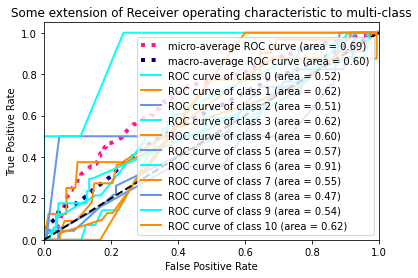

In [44]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), prediction.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_labels)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_labels):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_labels

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_labels), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [45]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_labels):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        prediction[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], prediction[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    prediction.ravel())
average_precision["micro"] = average_precision_score(y_test, prediction,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))


Average precision score, micro-averaged over all classes: 0.18


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.18')

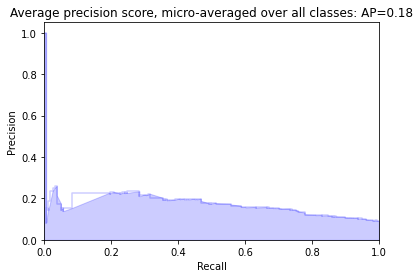

In [46]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')#,
                 #**step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [49]:
text_labels = encoder.classes_

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    #print(test_files_names.iloc[i])
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


y_pred = model.predict(x_test);
cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(label_names), normalize=True,
                      title='Normalized confusion matrix')

fig.savefig("txt_classification-smote" + str(num_epochs) + ".png", pad_inches=5.0)

KeyError: ignored

#try2

In [42]:
def hypothesis(theta, X):
    return 1 / (1 + np.exp(-(np.dot(theta, X.T)))) - 0.0000001

In [43]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [44]:
print(len(x_data))
print(len(y_data))
X = pd.concat([pd.Series(1, index=airline.index, name='00'), airline], axis=1)

787
787


In [14]:
y = y_data.iloc[:]

In [20]:
y_num = len(y.unique())

(787,)

In [45]:
y1 = np.zeros([airline.shape[0], len(y.unique())])
y1 = pd.DataFrame(y1)

In [49]:
for i in range(0, len(y.unique())):
    for j in range(0, len(y1)):
        if y[j] == y.unique()[i]:
            y1.iloc[j, i] = 1
        else: 
            y1.iloc[j, i] = 0
y1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(X)
    for i in range(0, epochs):
        for j in range(0, 10):
            theta = pd.DataFrame(theta)
            h = hypothesis(theta.iloc[:,j], X)
            for k in range(0, theta.shape[0]):
                theta.iloc[k, j] -= (alpha/m) * np.sum((h-y.iloc[:, j])*X.iloc[:, k])
            theta = pd.DataFrame(theta)
    return theta, cost

In [50]:
theta = np.zeros([airline.shape[1]+1, y1.shape[1]])
theta = gradient_descent(X, y1, theta, 0.02, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [40]:
theta

(              0             1             2   ...            8             9    10
 0  -1.136930e-02 -4.202845e-03 -1.172508e-02  ... -6.261295e-03 -3.338804e-03  0.0
 1  -1.542155e+16 -6.016152e+15 -1.568810e+16  ... -9.301436e+15 -4.366089e+15  0.0
 2  -3.986048e+00 -3.394595e+01  9.960432e+00  ... -5.136142e+01 -5.460484e-01  0.0
 3   5.058580e-01  1.142845e+01  1.523247e+01  ... -1.027630e+01 -4.976937e+00  0.0
 4   1.384394e-01  3.978633e-02  3.725945e-01  ...  1.638270e-01  5.925265e-02  0.0
 5  -8.640376e-03  1.206608e-01 -3.344343e-02  ... -4.462513e-02 -1.514609e-02  0.0
 6   2.407883e-02 -1.358318e-02  6.001276e-02  ...  4.184249e-02  1.350704e-02  0.0
 7  -8.221023e-02 -1.901645e-01 -1.509269e-01  ...  1.283616e-01 -1.498671e-03  0.0
 8  -4.428193e-02  2.753510e-02  1.335580e-01  ... -3.810658e-02  7.485403e-02  0.0
 9  -2.052089e-02 -7.556537e-02  3.493019e-02  ... -6.786524e-02  2.147468e-03  0.0
 10 -3.996174e-02 -3.279528e-02 -4.031752e-02  ... -9.203290e-02 -3.193124e-

In [41]:
theta1

,0
0,0 1 2 ...
1,<function cost at 0x7fb013d6ea60>


In [51]:
output = []
for i in range(0, 10):
    theta1 = pd.DataFrame(theta)
    h = hypothesis(theta1.iloc[:,i], X)
    output.append(h)
output=pd.DataFrame(output)

ValueError: ignored